In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [2]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [3]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-25:len(TS)-12].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-25:len(TS)-12].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSMeanPred = TS[len(TS)-25:len(TS)-12].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds_2015_1.png")
    del fig
    gc.collect()

In [4]:
def plot_ValSolutions2(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-19:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-19:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSMeanPred = TS[len(TS)-19:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[6,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.19], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds_2015_2.png")
    del fig
    gc.collect()

In [5]:
def plot_ValSolutions3(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)])
    TSMeanPred = TS[len(TS)-13:len(TS)].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-12:len(TS)])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-12:len(TS)])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[6,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.19], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds_2016.png")
    del fig
    gc.collect()

In [6]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
       TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
       TSValPredictions[1:] = TSPredictions.copy()
       TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[12.15,12.2,12.25], iter=[212,512]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/Test_preds_2015_1.png")
    del fig
    gc.collect()

In [7]:
def plot_TestSolutions2(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-7:len(TS)-0].copy()
    for x in PredictsList:
       TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
       TSValPredictions[1:] = TSPredictions.copy()
       TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-7:len(TS)-0].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSMeanPred = TS[len(TS)-7:len(TS)-0].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[6,7], hi_N= [9,11,7], learn_R=[6.15,6.2,6.25], iter=[26,56]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)    
    fig.savefig("Results/iteraciones/Test_preds_2015_2.png")
    del fig
    gc.collect()

In [8]:
def plot_TestSolutions3(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-6:len(TS)-0].copy()
    for x in PredictsList:
       TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
       TSValPredictions = TSPredictions.copy()
       TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-6:len(TS)-0].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSMeanPred = TS[len(TS)-6:len(TS)-0].copy()
    TSMeanPred = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    #TSUpper[1:] = TSUp
    #TSLower[1:] = TSlow
    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[6,6], hi_N= [9,11,6], learn_R=[6.15,6.2,6.25], iter=[26,56]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    #legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/Test_preds_2016.png")
    del fig
    gc.collect()

In [9]:
TS = get_TS()

In [10]:
def analyze_Val(predictions,TS,anotattion=False):
    predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    MeanRMSE = predictions['RMSE'].mean()
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
    params = ['Param1','Param2','Param3','Param4','Param5']
    meanPred = predictions[preds].mean()
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    RMSE = np.sqrt(np.mean((TS[-24:-12].values-meanPred)**2))
    meanTime = predictions['Time'].mean()
    plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)
    if(anotattion):        
        print "count = " + (str)(len(predictions))
        print "meanRMSE = " + (str)(MeanRMSE)
        print "true values = " + (str)(TS[-24:-12].values) 
        print "meanPreds = " + (str)(meanPred.values)
        print "RMSE of meanPreds = " + (str)(RMSE)
        print "Mean Time = " + (str)(meanTime)

In [11]:
def analyze_Val2(predictions,TS,anotattion=False):
    predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    MeanRMSE = predictions['RMSE'].mean()
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
    params = ['Param1','Param2','Param3','Param4','Param5']
    meanPred = np.mean(predictions[preds])
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    RMSE = np.sqrt(np.mean((TS[-18:-6].values-meanPred)**2))
    meanTime = predictions['Time'].mean()
    plot_ValSolutions2(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)
    if(anotattion):        
        print "count = " + (str)(len(predictions))
        print "meanRMSE = " + (str)(MeanRMSE)
        print "true values = " + (str)(TS[-18:-6].values) 
        print "meanPreds = " + (str)(meanPred.values)
        print "RMSE of meanPreds = " + (str)(RMSE)
        print "Mean Time = " + (str)(meanTime)

In [12]:
def analyze_Val3(predictions,TS,anotattion=False):
    predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    MeanRMSE = predictions['RMSE'].mean()
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
    params = ['Param1','Param2','Param3','Param4','Param5']
    meanPred = np.mean(predictions[preds])
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    RMSE = np.sqrt(np.mean((TS[-12:].values-meanPred)**2))
    meanTime = predictions['Time'].mean()
    plot_ValSolutions3(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)
    if(anotattion):        
        print "count = " + (str)(len(predictions))
        print "meanRMSE = " + (str)(MeanRMSE)
        print "true values = " + (str)(TS[-12:].values) 
        print "meanPreds = " + (str)(meanPred.values)
        print "RMSE of meanPreds = " + (str)(RMSE)
        print "Mean Time = " + (str)(meanTime)

In [13]:
def analyze_Test(test_predictions,TS,anotattion=False):
    #predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']
    params = ['Param1','Param2','Param3','Param4','Param5']
    test_predictions = test_predictions[test_predictions['Pred6']<15]
    test_predictions = test_predictions[test_predictions['Pred5']<15]
    test_predictions = test_predictions[test_predictions['Pred6']>-15]
    test_predictions = test_predictions[test_predictions['Pred5']>-15]
    #test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))
    #meantestRMSE = test_predictions['RMSE'].mean()
    meantestRMSE = 0
    testmean = np.mean(test_predictions[preds])
    upperBound = testmean + meantestRMSE
    lowerBound = testmean - meantestRMSE
    testRMSE = np.sqrt(np.mean((TS[-12:-6].values-testmean)**2))
    plot_TestSolutions(test_predictions[preds].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())
    if(anotattion):        
        print "count = " + (str)(len(test_predictions))
        print "meanRMSE = " + (str)(meantestRMSE)
        print "true values = " + (str)(TS[-12:-6].values) 
        print "meanPreds = " + (str)(testmean.values)
        print "RMSE of meanPreds = " + (str)(testRMSE)
        #print "Mean Time = " + (str)(meanTime)

In [14]:
def analyze_Test2(test_predictions,TS,anotattion=False):
    #predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']
    params = ['Param1','Param2','Param3','Param4','Param5']
    test_predictions = test_predictions[test_predictions['Pred6']<15]
    test_predictions = test_predictions[test_predictions['Pred5']<15]
    test_predictions = test_predictions[test_predictions['Pred6']>-15]
    test_predictions = test_predictions[test_predictions['Pred5']>-15]
    #test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))
    #meantestRMSE = test_predictions['RMSE'].mean()
    meantestRMSE = 0
    testmean = np.mean(test_predictions[preds])
    upperBound = testmean + meantestRMSE
    lowerBound = testmean - meantestRMSE
    testRMSE = np.sqrt(np.mean((TS[-6:].values-testmean)**2))
    plot_TestSolutions2(test_predictions[preds].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())
    if(anotattion):        
        print "count = " + (str)(len(test_predictions))
        print "meanRMSE = " + (str)(meantestRMSE)
        print "true values = " + (str)(TS[-6:].values) 
        print "meanPreds = " + (str)(testmean.values)
        print "RMSE of meanPreds = " + (str)(testRMSE)
        #print "Mean Time = " + (str)(meanTime)

In [15]:
def analyze_Test3(test_predictions,anotattion=False):
    dates = [pd.datetime(2016,01,31),pd.datetime(2016,02,29),pd.datetime(2016,03,31),pd.datetime(2016,04,30),pd.datetime(2016,05,31),
             pd.datetime(2016,06,30)]
    #predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']
    index = pd.DatetimeIndex(dates)
    TS = pd.Series(index=index)
    params = ['Param1','Param2','Param3','Param4','Param5']
    test_predictions = test_predictions[test_predictions['Pred6']<15]
    test_predictions = test_predictions[test_predictions['Pred5']<15]
    test_predictions = test_predictions[test_predictions['Pred6']>-15]
    test_predictions = test_predictions[test_predictions['Pred5']>-15]
    #test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))
    #meantestRMSE = test_predictions['RMSE'].mean()
    meantestRMSE = 0
    testmean = np.mean(test_predictions[preds])
    upperBound = testmean + meantestRMSE
    lowerBound = testmean - meantestRMSE
    #testRMSE = np.sqrt(np.mean((TS[-6:].values-testmean)**2))
    testRMSE = 0
    plot_TestSolutions3(test_predictions[preds].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())
    if(anotattion):        
        print "count = " + (str)(len(test_predictions))
        #print "meanRMSE = " + (str)(meantestRMSE)
        #print "true values = " + (str)(TS[-6:].values) 
        print "meanPreds = " + (str)(testmean.values)
       # print "RMSE of meanPreds = " + (str)(testRMSE)
        #print "Mean Time = " + (str)(meanTime)

In [17]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions_2015_1.csv" )
predictions = pd.read_csv("Results/iteraciones/Validation_predicions_2015_1.csv" )


count = 50
meanRMSE = 1.9984308535
true values = [-4.32 -5.13  4.33  0.62  1.6   3.32  2.53  4.13 -1.41  0.09 -1.86 -2.36]
meanPreds = [-3.21070868 -4.49125843  1.80375978 -0.39580909  2.79936782  2.61962885
  2.34908037  1.21542965 -0.7610128  -2.10774736 -1.66975653 -1.94132846]
RMSE of meanPreds = 1.44255234531
Mean Time = 770.716160021


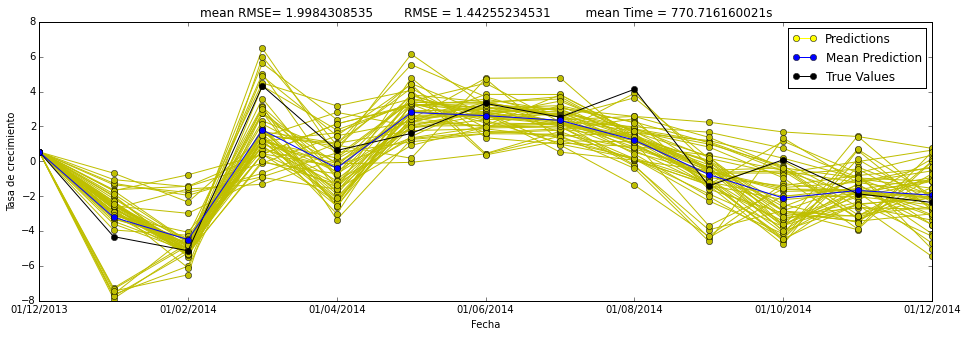

In [47]:
analyze_Val(predictions,TS,True)

In [48]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions_2015_1.csv" )

count = 45
meanRMSE = 0
true values = [-5.09  7.91 -1.05  1.96  0.27  0.78]
meanPreds = [-2.55804401  0.1421252  -3.4013956   3.45228887 -0.09729467  1.17155659]
RMSE of meanPreds = 3.53069609088


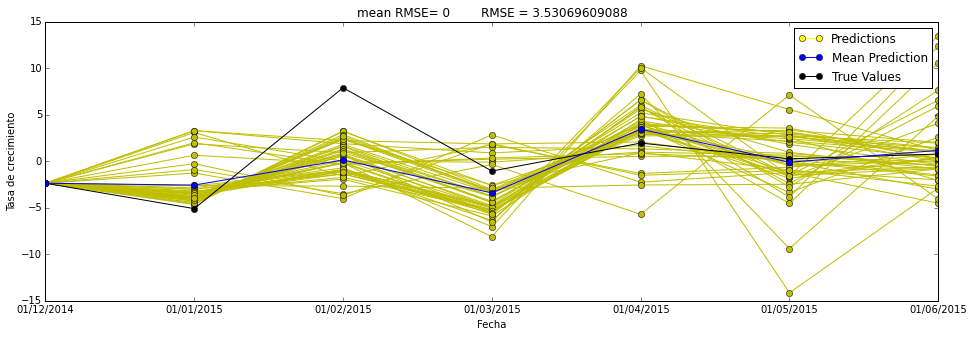

In [49]:
analyze_Test(test_predictions,TS,True)

In [50]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions_2015_2.csv" )

count = 50
meanRMSE = 2.22239513634
true values = [ 2.53  4.13 -1.41  0.09 -1.86 -2.36 -5.09  7.91 -1.05  1.96  0.27  0.78]
meanPreds = [ 2.72016218  1.40814816  0.453161   -0.94273086 -2.32624575 -0.81866691
 -4.36661187  4.39683993 -0.45813172  1.43805393  0.11429708 -0.86468326]
RMSE of meanPreds = 1.60190459831
Mean Time = 755.81940001


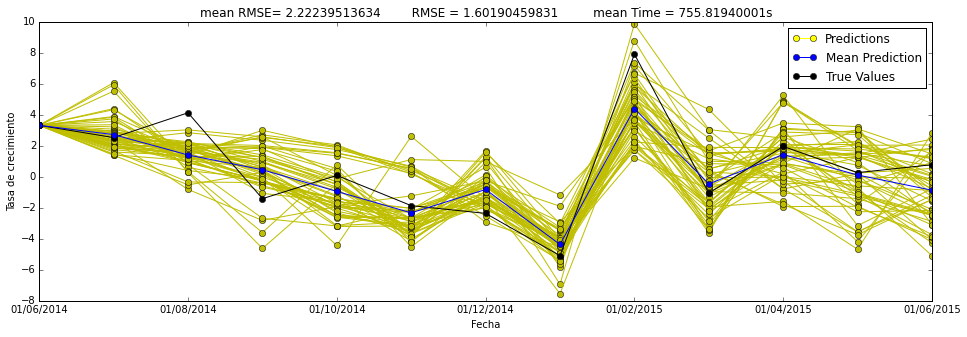

In [51]:
analyze_Val2(predictions,TS,True)

In [52]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions_2015_2.csv" )

count = 45
meanRMSE = 0
true values = [-0.67 -2.3  -2.49  4.48 -2.52 -1.02]
meanPreds = [ 1.59747013  0.07979549 -2.27879023 -1.46996504 -3.08123071  0.56615264]
RMSE of meanPreds = 2.86013988621


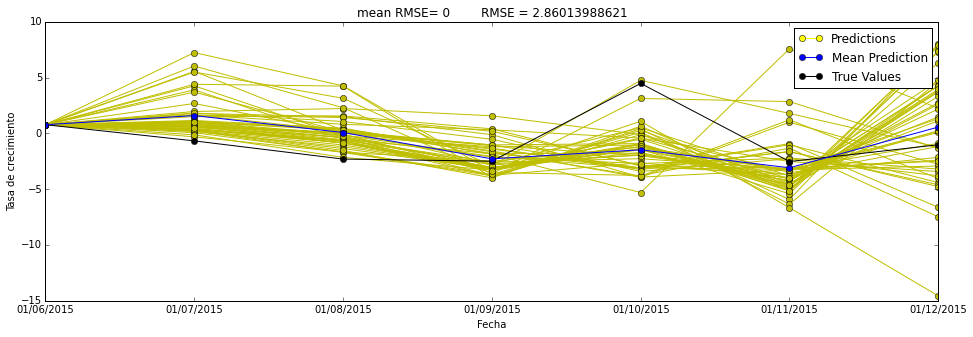

In [53]:
analyze_Test2(test_predictions,TS,True)

In [54]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions_2016.csv" )

count = 50
meanRMSE = 2.56936298761
true values = [-5.09  7.91 -1.05  1.96  0.27  0.78 -0.67 -2.3  -2.49  4.48 -2.52 -1.02]
meanPreds = [-3.90616932  2.74678942 -2.1528149   1.55766996  1.07257069  0.37497398
 -0.86986361 -1.98279468 -2.89282764  1.30471283 -1.46329616 -0.26673155]
RMSE of meanPreds = 1.87784793279
Mean Time = 776.482060003


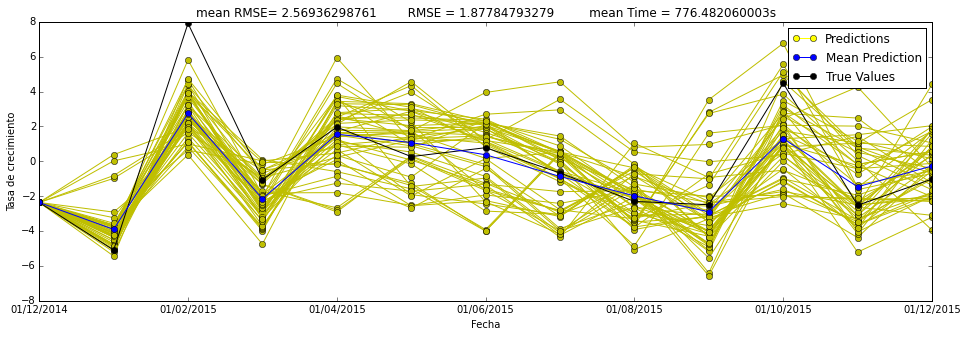

In [55]:
analyze_Val3(predictions,TS,True)

In [57]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions_2016.csv" )

count = 45
meanPreds = [-3.74636043  1.13048645 -1.28014756  0.03614717  0.59868008 -0.85244921]


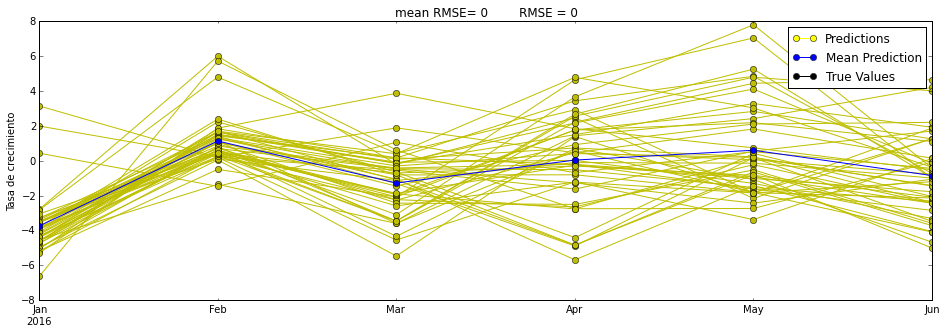

In [58]:
analyze_Test3(test_predictions,True)

In [50]:
test_predictions[params]

,Param1,Param2,Param3,Param4,Param5
0,300,1.0,0.6,0.6,1.000000e-07
1,300,0.3,0.7,0.4,1.000000e-09
2,200,0.1,1.1,0.6,1.000000e-07
3,200,0.1,0.8,0.6,1.000000e-09
4,300,0.5,0.8,0.3,1.000000e-09


In [51]:
testmean= test_predictions[predsTest].mean()

In [52]:
test_predictions[predsTest].mean()

Pred1    -0.879303
Pred2    -1.705185
Pred3     4.018346
Pred4    -9.322300
Pred5    -8.506193
Pred6    24.645721
dtype: float64

In [53]:
test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [54]:
meantestRMSE = test_predictions['RMSE'].mean()
test_predictions = test_predictions[test_predictions['RMSE']<10]

In [55]:
test_predictions['RMSE']

Series([], Name: RMSE, dtype: float64)

In [56]:
testRMSE = RMSE = np.sqrt(np.mean((TS[-12:-6].values-testmean)**2))

In [57]:
upperBound = testmean + meantestRMSE
lowerBound = testmean - meantestRMSE

In [58]:
test_predictions.count()

Param1    0
Param2    0
Param3    0
Param4    0
Param5    0
Pred1     0
Pred2     0
Pred3     0
Pred4     0
Pred5     0
Pred6     0
MSE       0
RMSE      0
dtype: int64

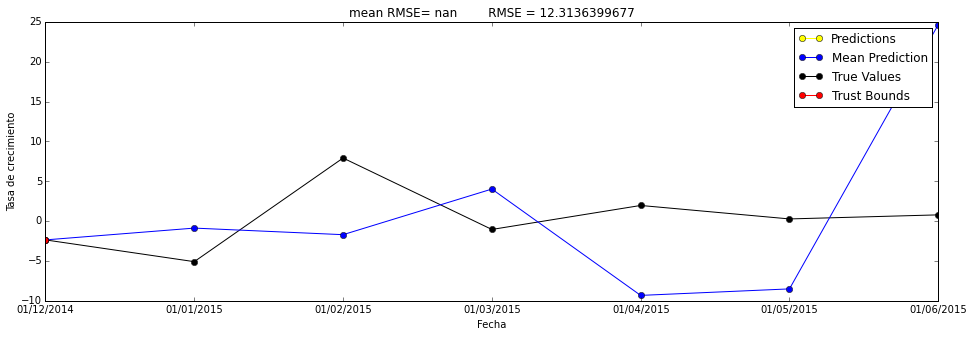

In [59]:
plot_TestSolutions(test_predictions[predsTest].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())

In [106]:
dates = [pd.datetime(2016,01,31),pd.datetime(2016,02,29),pd.datetime(2016,03,31),pd.datetime(2016,04,30),pd.datetime(2016,05,31),
             pd.datetime(2016,06,30)]

In [116]:
index = pd.DatetimeIndex(dates)

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30'],
              dtype='datetime64[ns]', freq=None, tz=None)